# ______________  Rainfall Weather Forecasting  ____________________

Name : Radha Kulkarni                                                                                                          
Project Batch : DS2401

# Project Description

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.                                                    
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:


#  Problem Statement: 

a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.      
b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


# Dataset Description

Date  - The date of observation                                                                                                 
Location  -The common name of the location of the weather station                                                               
MinTemp  -The minimum temperature in degrees celsius                                                                            
MaxTemp -The maximum temperature in degrees celsius                                                                              
Rainfall  -The amount of rainfall recorded for the day in mm                                                                     
Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am                                                  
Sunshine  -The number of hours of bright sunshine in the day.                                                                    
WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight                                               
WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight                                           
WindDir9am -Direction of the wind at 9am                                                                                         
WindDir3pm -Direction of the wind at 3pm                                                                                         
WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am                                                           
WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm                                                           
Humidity9am -Humidity (percent) at 9am                                                                                           
Humidity3pm -Humidity (percent) at 3pm                                                                                           
Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am                                                         
Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm                                                         
Cloud9am - Fraction of sky obscured by cloud at 9am.                                                                              
Cloud3pm -Fraction of sky obscured by cloud                                                                                       
Temp9am-Temperature (degrees C) at 9am                                                                                            
Temp3pm -Temperature (degrees C) at 3pm                                                                                           
RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0                                       
RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".


In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Rainfall%20Forecast/Rainfall.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [5]:
#checking for shape of dataset
df.shape

(8425, 23)

It contains 8425 rows and 23 columns.

In [6]:
#checking for columns
df.columns.to_list()

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

In [7]:
#checking for data types of each column
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

The Date column is currently of the object data type, but it should be converted to a date data type.

In [8]:
df['Date']=pd.to_datetime(df['Date'])

In [9]:
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year
df.drop(columns=['Date'],inplace=True)

In [10]:
#checking for info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   object 
 1   MinTemp        8350 non-null   float64
 2   MaxTemp        8365 non-null   float64
 3   Rainfall       8185 non-null   float64
 4   Evaporation    4913 non-null   float64
 5   Sunshine       4431 non-null   float64
 6   WindGustDir    7434 non-null   object 
 7   WindGustSpeed  7434 non-null   float64
 8   WindDir9am     7596 non-null   object 
 9   WindDir3pm     8117 non-null   object 
 10  WindSpeed9am   8349 non-null   float64
 11  WindSpeed3pm   8318 non-null   float64
 12  Humidity9am    8366 non-null   float64
 13  Humidity3pm    8323 non-null   float64
 14  Pressure9am    7116 non-null   float64
 15  Pressure3pm    7113 non-null   float64
 16  Cloud9am       6004 non-null   float64
 17  Cloud3pm       5970 non-null   float64
 18  Temp9am 

1) There is presence of null values in the dataset.
2) There are 16 columns of float datatype,3 columns are of int datatype and 6 columns are of object datatype.

In [11]:
#checking for duplicated values
df.duplicated().sum()

1663

In [12]:
#droping duplicated values
df=df.drop_duplicates()

In [13]:
df.shape

(6762, 25)

In [14]:
#checking for unique values
df.nunique()

Location          12
MinTemp          285
MaxTemp          331
Rainfall         250
Evaporation      116
Sunshine         140
WindGustDir       16
WindGustSpeed     52
WindDir9am        16
WindDir3pm        16
WindSpeed9am      34
WindSpeed3pm      35
Humidity9am       90
Humidity3pm       94
Pressure9am      384
Pressure3pm      374
Cloud9am           9
Cloud3pm           9
Temp9am          304
Temp3pm          328
RainToday          2
RainTomorrow       2
Day               31
Month             12
Year              10
dtype: int64

Our target columns 'Rain Tomorrow' contains two unique values and 'Rainfall' contains 250 unique values.

In [15]:
for i in df.columns:
    print(i,':\n')
    print(df[i].value_counts())
    print('*'*100)

Location :

PerthAirport    1204
Albury           907
Newcastle        822
Melbourne        811
Williamtown      615
CoffsHarbour     611
Brisbane         579
Penrith          482
Darwin           250
Wollongong       237
Adelaide         205
Uluru             39
Name: Location, dtype: int64
****************************************************************************************************
MinTemp :

13.2    58
12.0    57
14.8    53
12.7    53
10.8    52
        ..
26.6     1
28.0     1
26.9     1
1.4      1
26.0     1
Name: MinTemp, Length: 285, dtype: int64
****************************************************************************************************
MaxTemp :

19.0    66
19.8    62
20.8    54
23.8    54
25.0    54
        ..
38.9     1
10.3     1
9.4      1
42.5     1
43.5     1
Name: MaxTemp, Length: 331, dtype: int64
****************************************************************************************************
Rainfall :

0.0      4334
0.2       321
0.4       144
0.6 

Location            0
MinTemp            70
MaxTemp            57
Rainfall          138
Evaporation      2921
Sunshine         3236
WindGustDir       942
WindGustSpeed     942
WindDir9am        794
WindDir3pm        294
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Cloud9am         1866
Cloud3pm         1902
Temp9am            51
Temp3pm            92
RainToday         138
RainTomorrow      138
Day                 0
Month               0
Year                0
dtype: int64


<Axes: >

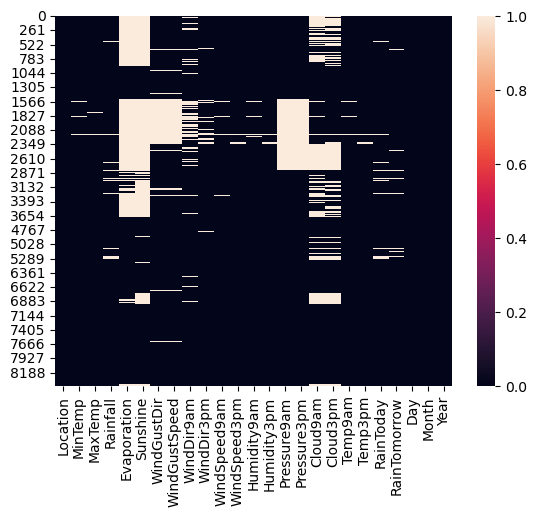

In [16]:
#checking for null values
print(df.isnull().sum())
sns.heatmap(df.isnull())

There are the presence of null values in almost all columns.

In [17]:
#seperating categorical and numerical column
cat_col=[]
for i in df.columns:
    if df[i].dtypes=='object':
        cat_col.append(i)
print('Categorical columns :',cat_col)
print('\n')

num_col=[]
for i in df.columns:
    if df[i].dtypes!='object':
        num_col.append(i)
        
print('Numerical coulmns :',num_col)

Categorical columns : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


Numerical coulmns : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Day', 'Month', 'Year']


In [18]:
#handling null values
for i in cat_col:
     df[i].fillna(df[i].mode()[0],inplace=True)

In [19]:
for i in num_col:
     df[i].fillna(np.mean(df[i]),inplace=True)

In [20]:
#rechecking for null values
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

As we can see all null values has been removed.

# Stastical analysis

In [31]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
count,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000,6762.000000
mean,13.109145,24.098345,2.780148,5.302395,7.890896,38.977663,12.782206,17.571150,67.506559,50.467147,1017.626311,1015.119923,4.336806,4.320988,17.895038,22.708561,15.737208,6.462141,2012.052203
std,5.540667,6.130123,10.482769,3.343713,2.733639,13.376457,9.787577,9.548634,17.182700,18.498341,6.027914,5.967638,2.474649,2.323276,5.722411,5.971845,8.793898,3.377471,2.301057
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000,1.000000,1.000000,2008.000000
25%,9.000000,19.600000,0.000000,4.000000,7.890896,30.000000,6.000000,11.000000,56.000000,38.000000,1014.200000,1011.500000,2.000000,3.000000,13.900000,18.400000,8.000000,4.000000,2010.000000
50%,13.109145,23.500000,0.000000,5.302395,7.890896,38.977663,11.000000,17.000000,68.000000,50.000000,1017.626311,1015.119923,4.336806,4.320988,17.900000,22.300000,16.000000,6.000000,2012.000000
75%,17.400000,28.400000,1.200000,5.302395,9.200000,46.000000,19.000000,24.000000,80.000000,62.000000,1020.900000,1018.400000,7.000000,6.000000,22.200000,26.800000,23.000000,9.000000,2014.000000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,31.000000,12.000000,2017.000000


1) Counts are same there are no null values.
2) There is not much difference between mean and median which means data is normally distributed.
3) We can observe the gap between 75th percentile and max value which indicates the presence of outliers.
4) Maximum Rainfall is 371.00 and minimun Rainfall is 0

# Exploratory Data Analysis (EDA) and data visualization

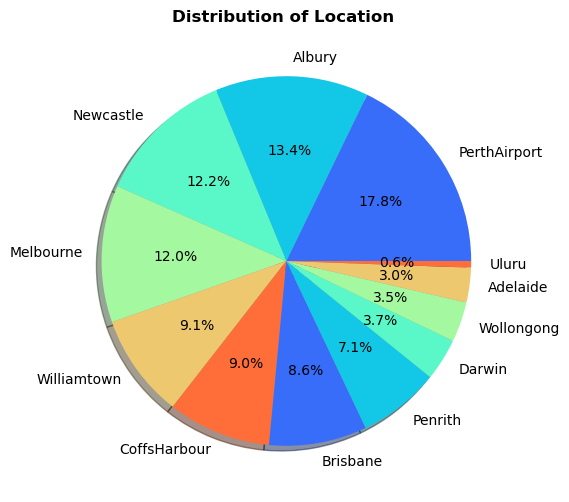

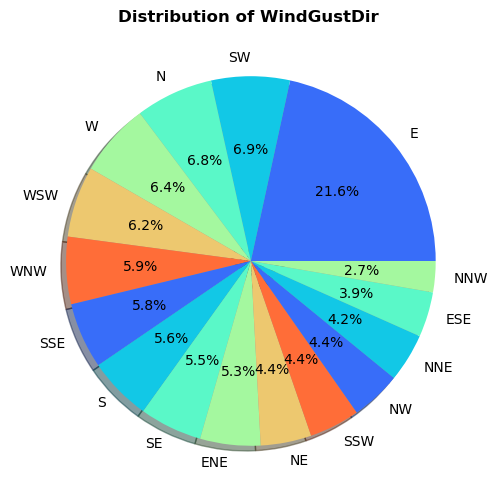

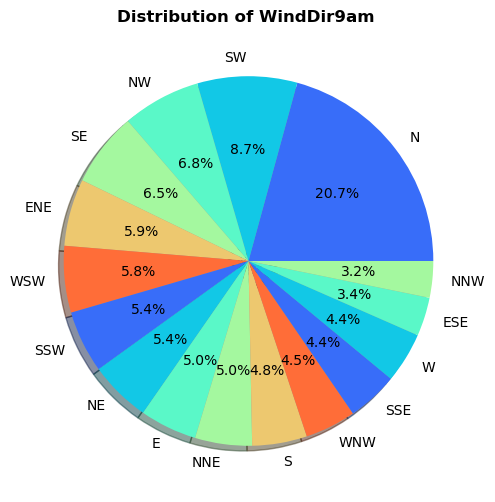

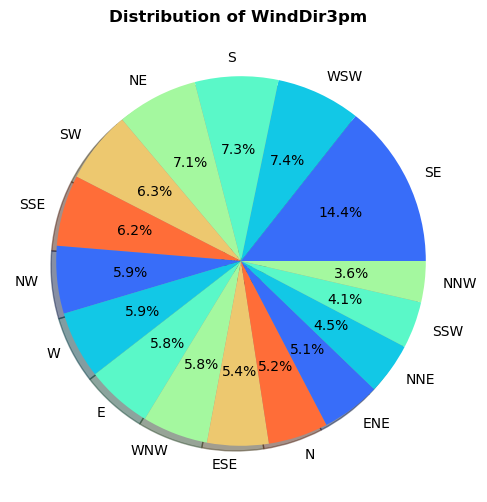

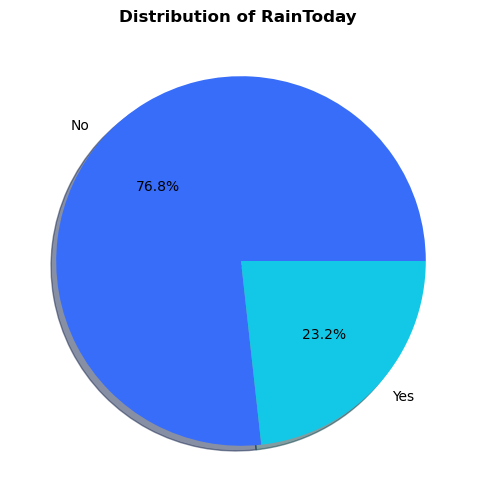

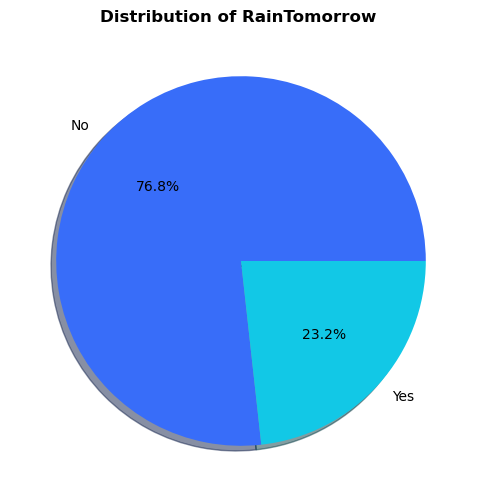

In [58]:
for i in cat_col:
    plt.figure(figsize=(8,6))
    df[i].value_counts().plot.pie(autopct='%1.1f%%',fontsize=10,shadow=True,colors=sns.color_palette('rainbow'))
    plt.title(f'Distribution of {i} ',fontweight='bold')
    plt.ylabel('')
    plt.show()

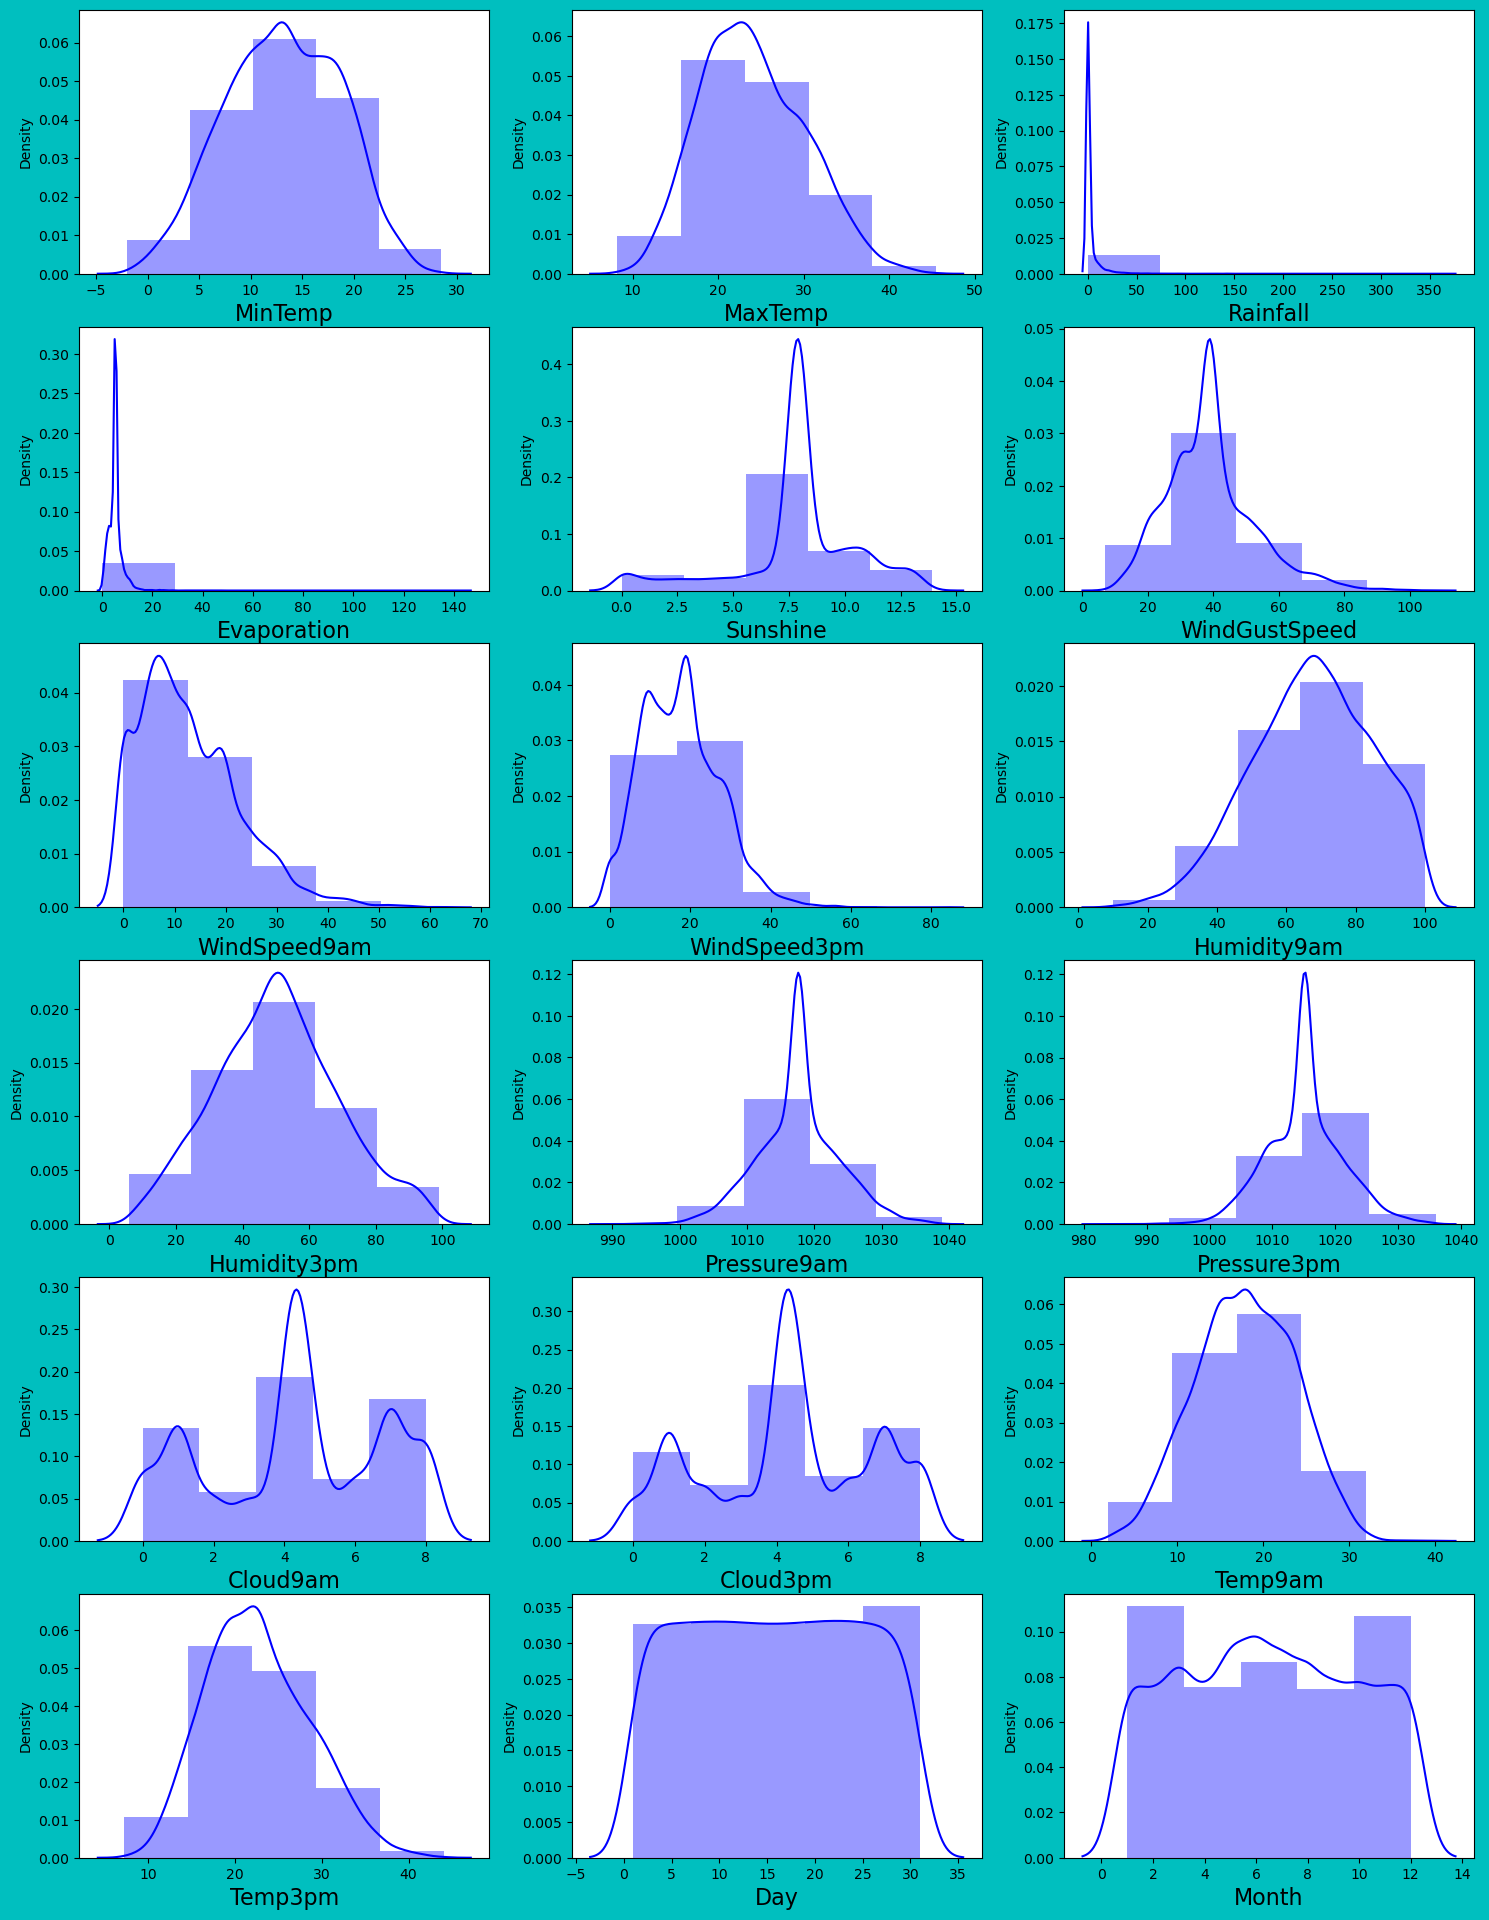

In [56]:
plt.figure(figsize=(18,24),facecolor='c')
pltnum=1
for col in num_col:
    if pltnum<=18:
        ax=plt.subplot(6,3,pltnum)
        sns.distplot(df[col],kde=True,bins=5,color='blue')
        plt.xlabel(col,fontsize=16)
        pltnum+=1
plt.show()

observations:
   1)  Minimum temperature lies between -5 to 30.
   2) Maximum temperature lies between 5 to 50.
   3) The distrubution of windspeed at 9am and 3pm looks same
   4) The distrubution of Humidity at 3pm is more compared to 9am.
   5) There is not a big difference between distrubution of cloud,pressure.temperature at 9am and 3pm.

Text(0, 0.5, 'Count Of rainfall')

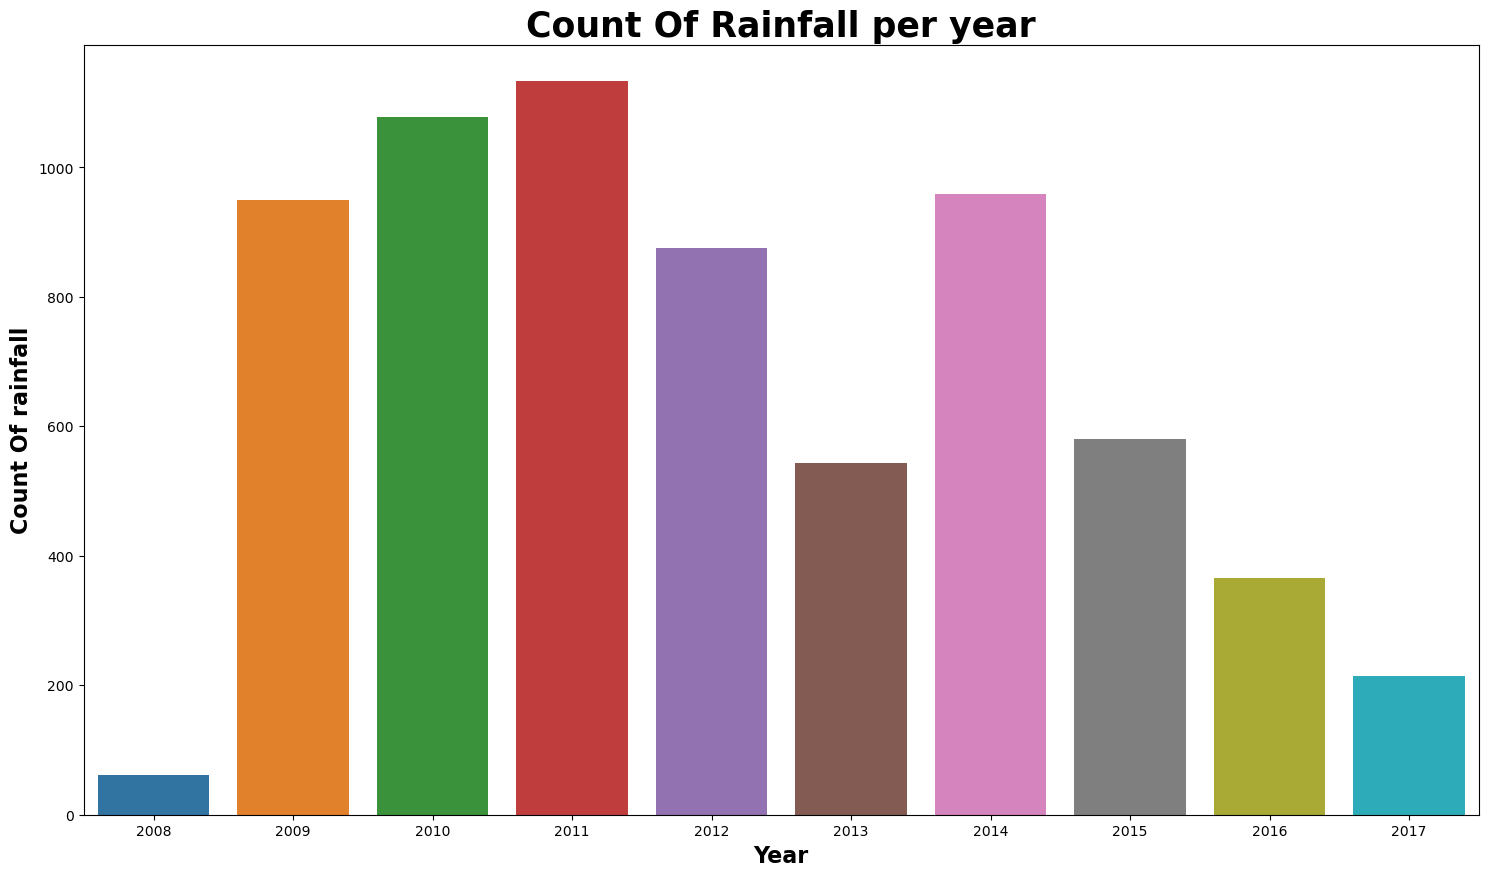

In [28]:
plt.figure(figsize=(18,10))
sns.countplot(x='Year',data=df)
plt.title('Count Of Rainfall per year',fontsize=25,fontweight='bold')
plt.xlabel('Year',fontsize=16,fontweight='bold')
plt.ylabel('Count Of rainfall',fontsize=16,fontweight='bold')


2011 having maximum rainfall then 2010,followed by2014.                                                                         

2008 having minimum rainfall.

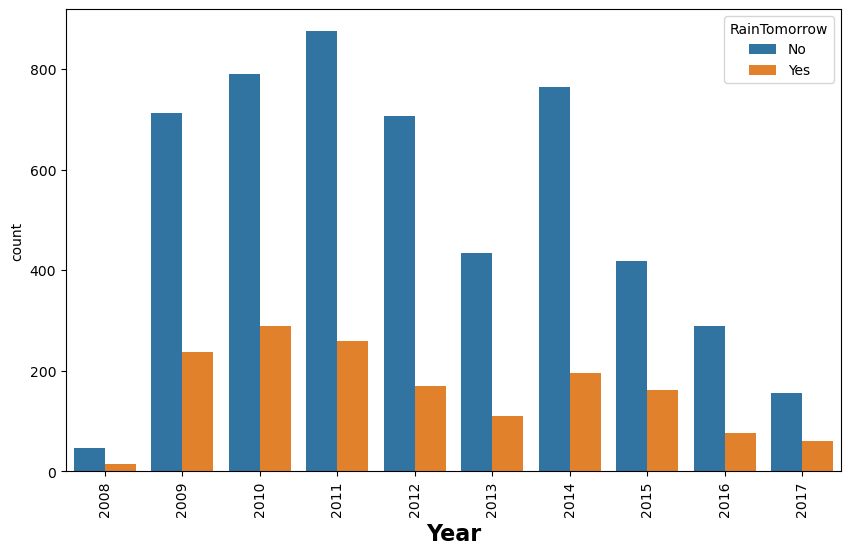

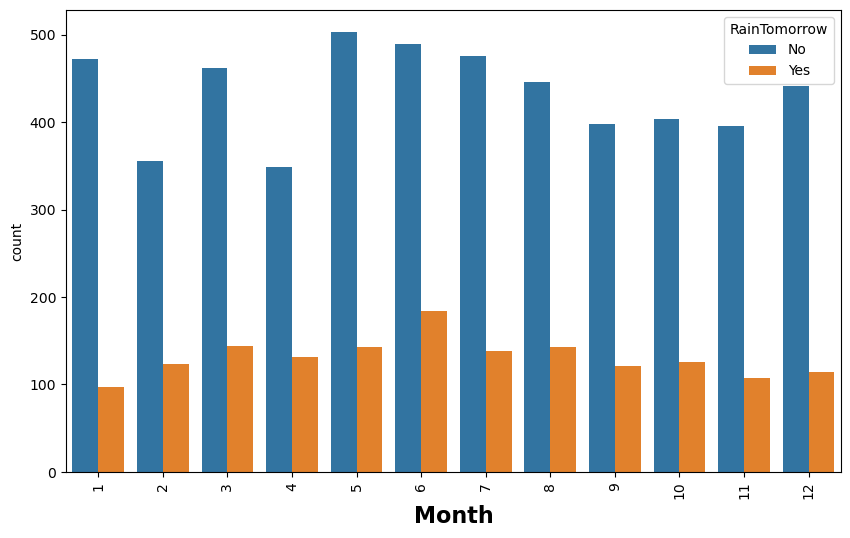

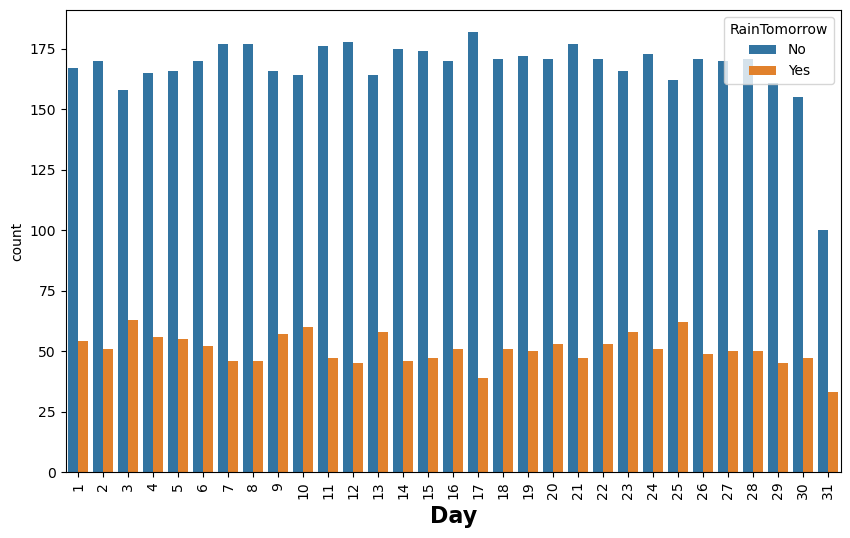

In [53]:
columns=['Year','Month','Day']

for i in column:
    plt.figure(figsize=(10,6))
    sns.countplot(x=df[i],hue=df['RainTomorrow'],data=df)
    plt.xlabel(i,fontsize=16,fontweight='bold')
    plt.xticks(rotation=90)
    plt.show()

The years 2009, 2010, and 2011 have the highest instances of rain predicted for tomorrow.                                       
June experiences the highest amount of rain.                                                                                   
The 3rd, 10th, and 25th days of the month have the highest rainfall.

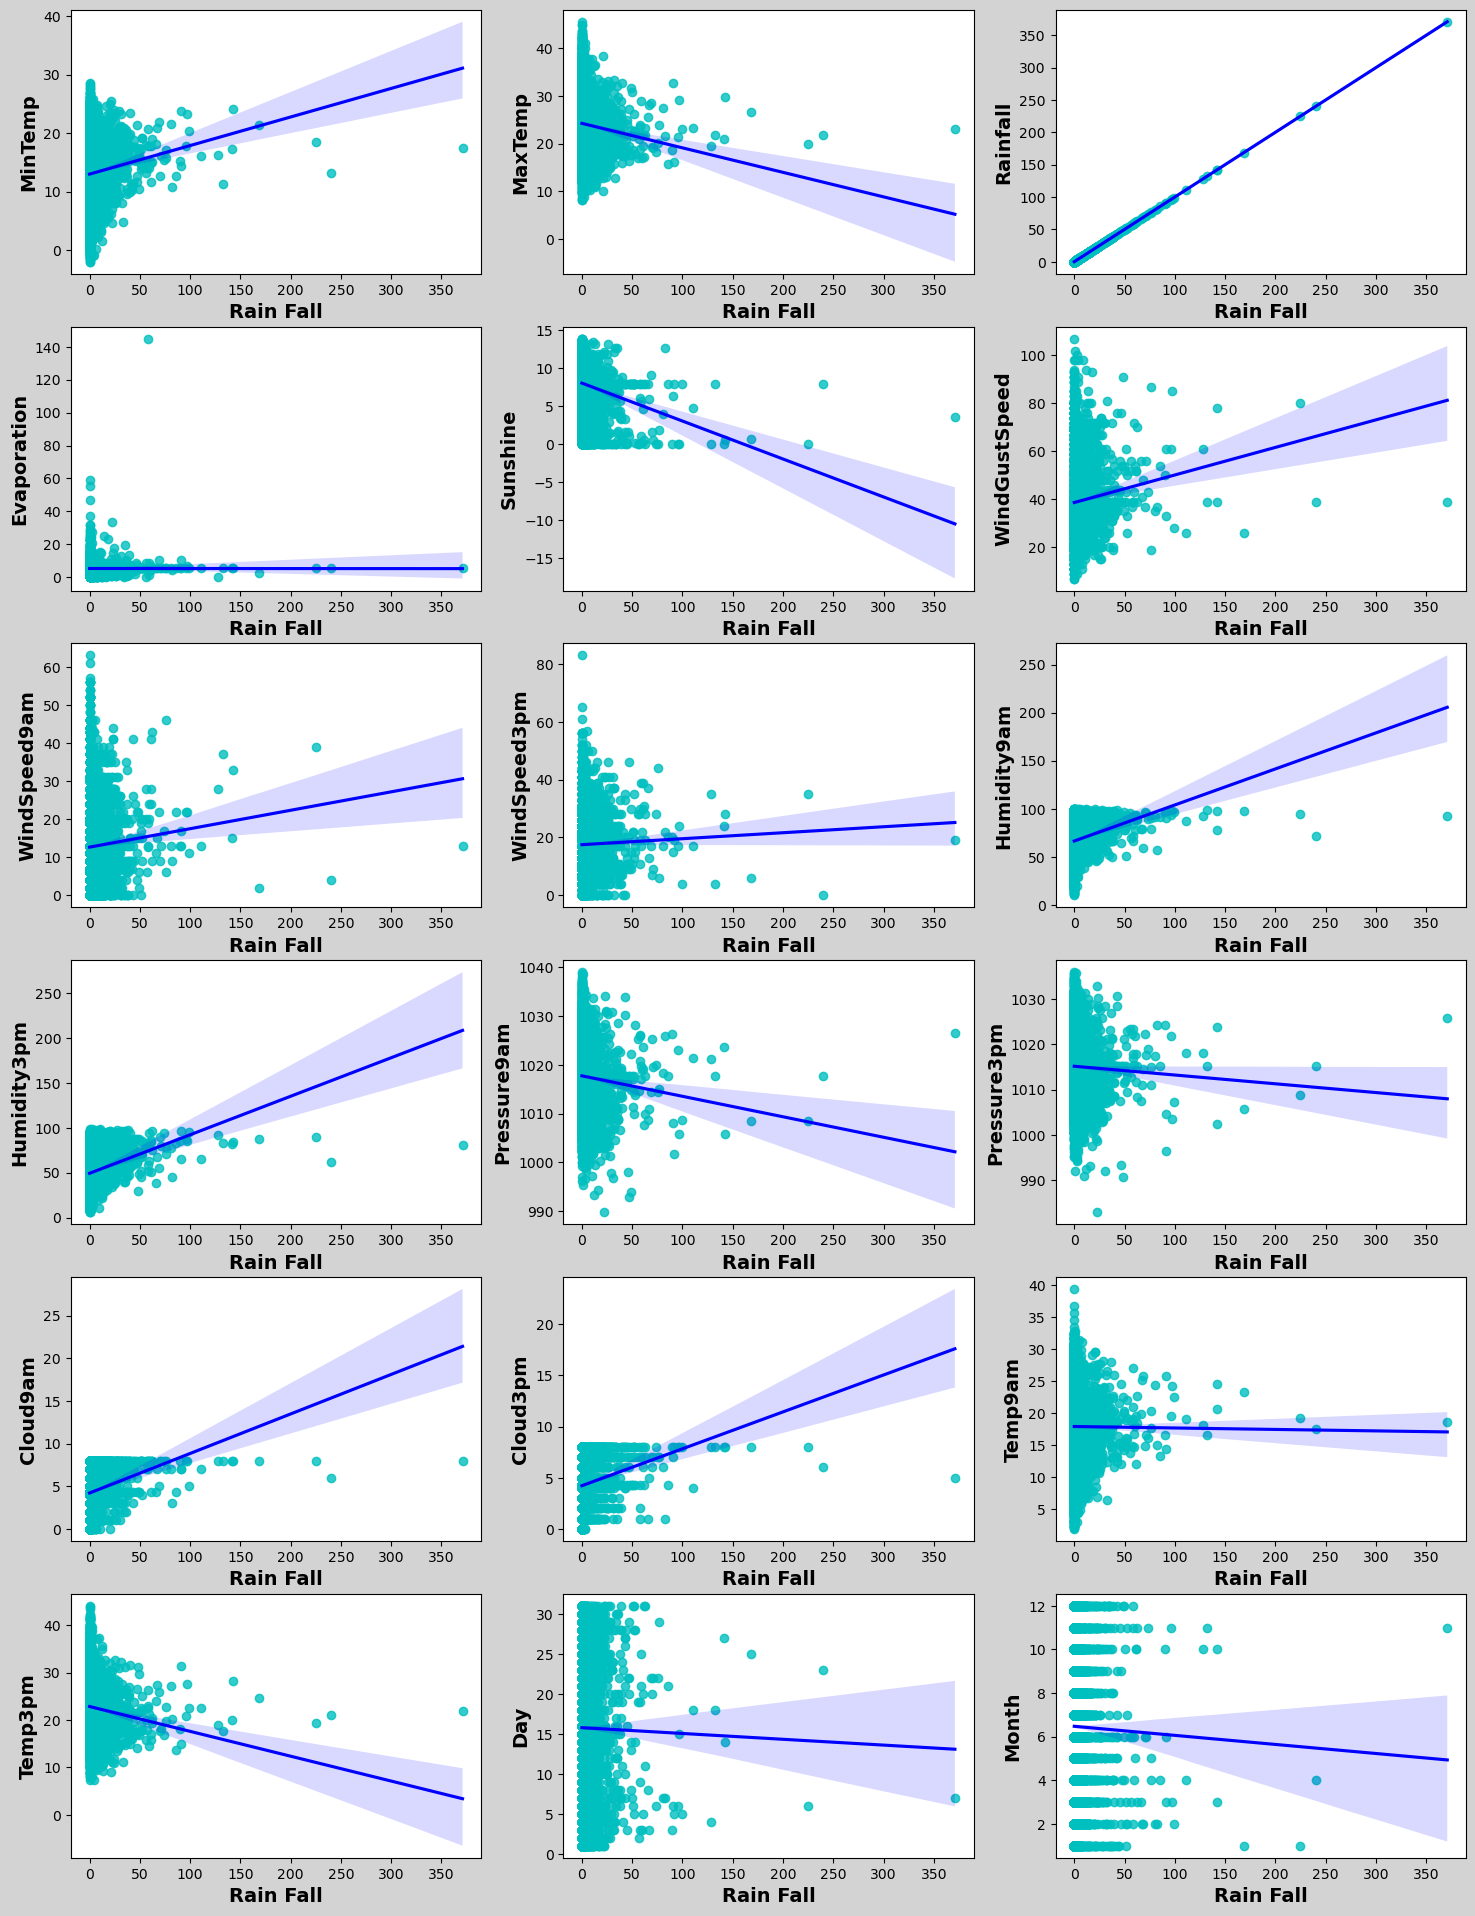

In [60]:
plt.figure(figsize=(18,24),facecolor='lightgrey')
pltnum=1

for i in num_col:
    if pltnum<=18:
        ax=plt.subplot(6,3,pltnum)
        sns.regplot(y=df[i],x='Rainfall',color='c',data=df,line_kws=dict(color='blue'))
        plt.xlabel('Rain Fall',fontsize=14,fontweight='bold')
        plt.ylabel(i,fontsize=14,fontweight='bold')
        pltnum+=1
plt.show()
           

Rainfall is directly related to minimum temperature, humidity, cloud cover, and WindGustSpeed.                                  
Rainfall is inversely proportional to maximum temperature, sunshine, and pressure.

# Encoding


In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le=LabelEncoder()

In [23]:
for i in df.columns:
    df[i]=le.fit_transform(df[i])

In [24]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,1,150,134,5,28,79,13,21,13,14,...,103,9,5,145,134,0,0,0,11,0
1,1,89,157,0,28,79,14,21,6,15,...,110,5,5,148,160,0,0,1,11,0
2,1,144,163,0,28,79,15,22,13,15,...,119,5,2,187,149,0,0,2,11,0
3,1,107,186,0,28,79,4,9,9,0,...,160,5,5,158,182,0,0,3,11,0
4,1,191,229,8,28,79,13,19,1,7,...,92,8,9,154,214,0,0,4,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,43,139,0,28,79,0,13,9,1,...,236,5,5,77,140,0,0,20,5,9
8421,9,51,159,0,28,79,6,8,9,3,...,224,5,5,85,162,0,0,21,5,9
8422,9,69,175,0,28,79,3,16,9,14,...,201,5,5,101,178,0,0,22,5,9
8423,9,93,176,0,28,79,9,11,10,3,...,198,3,2,127,177,0,0,23,5,9


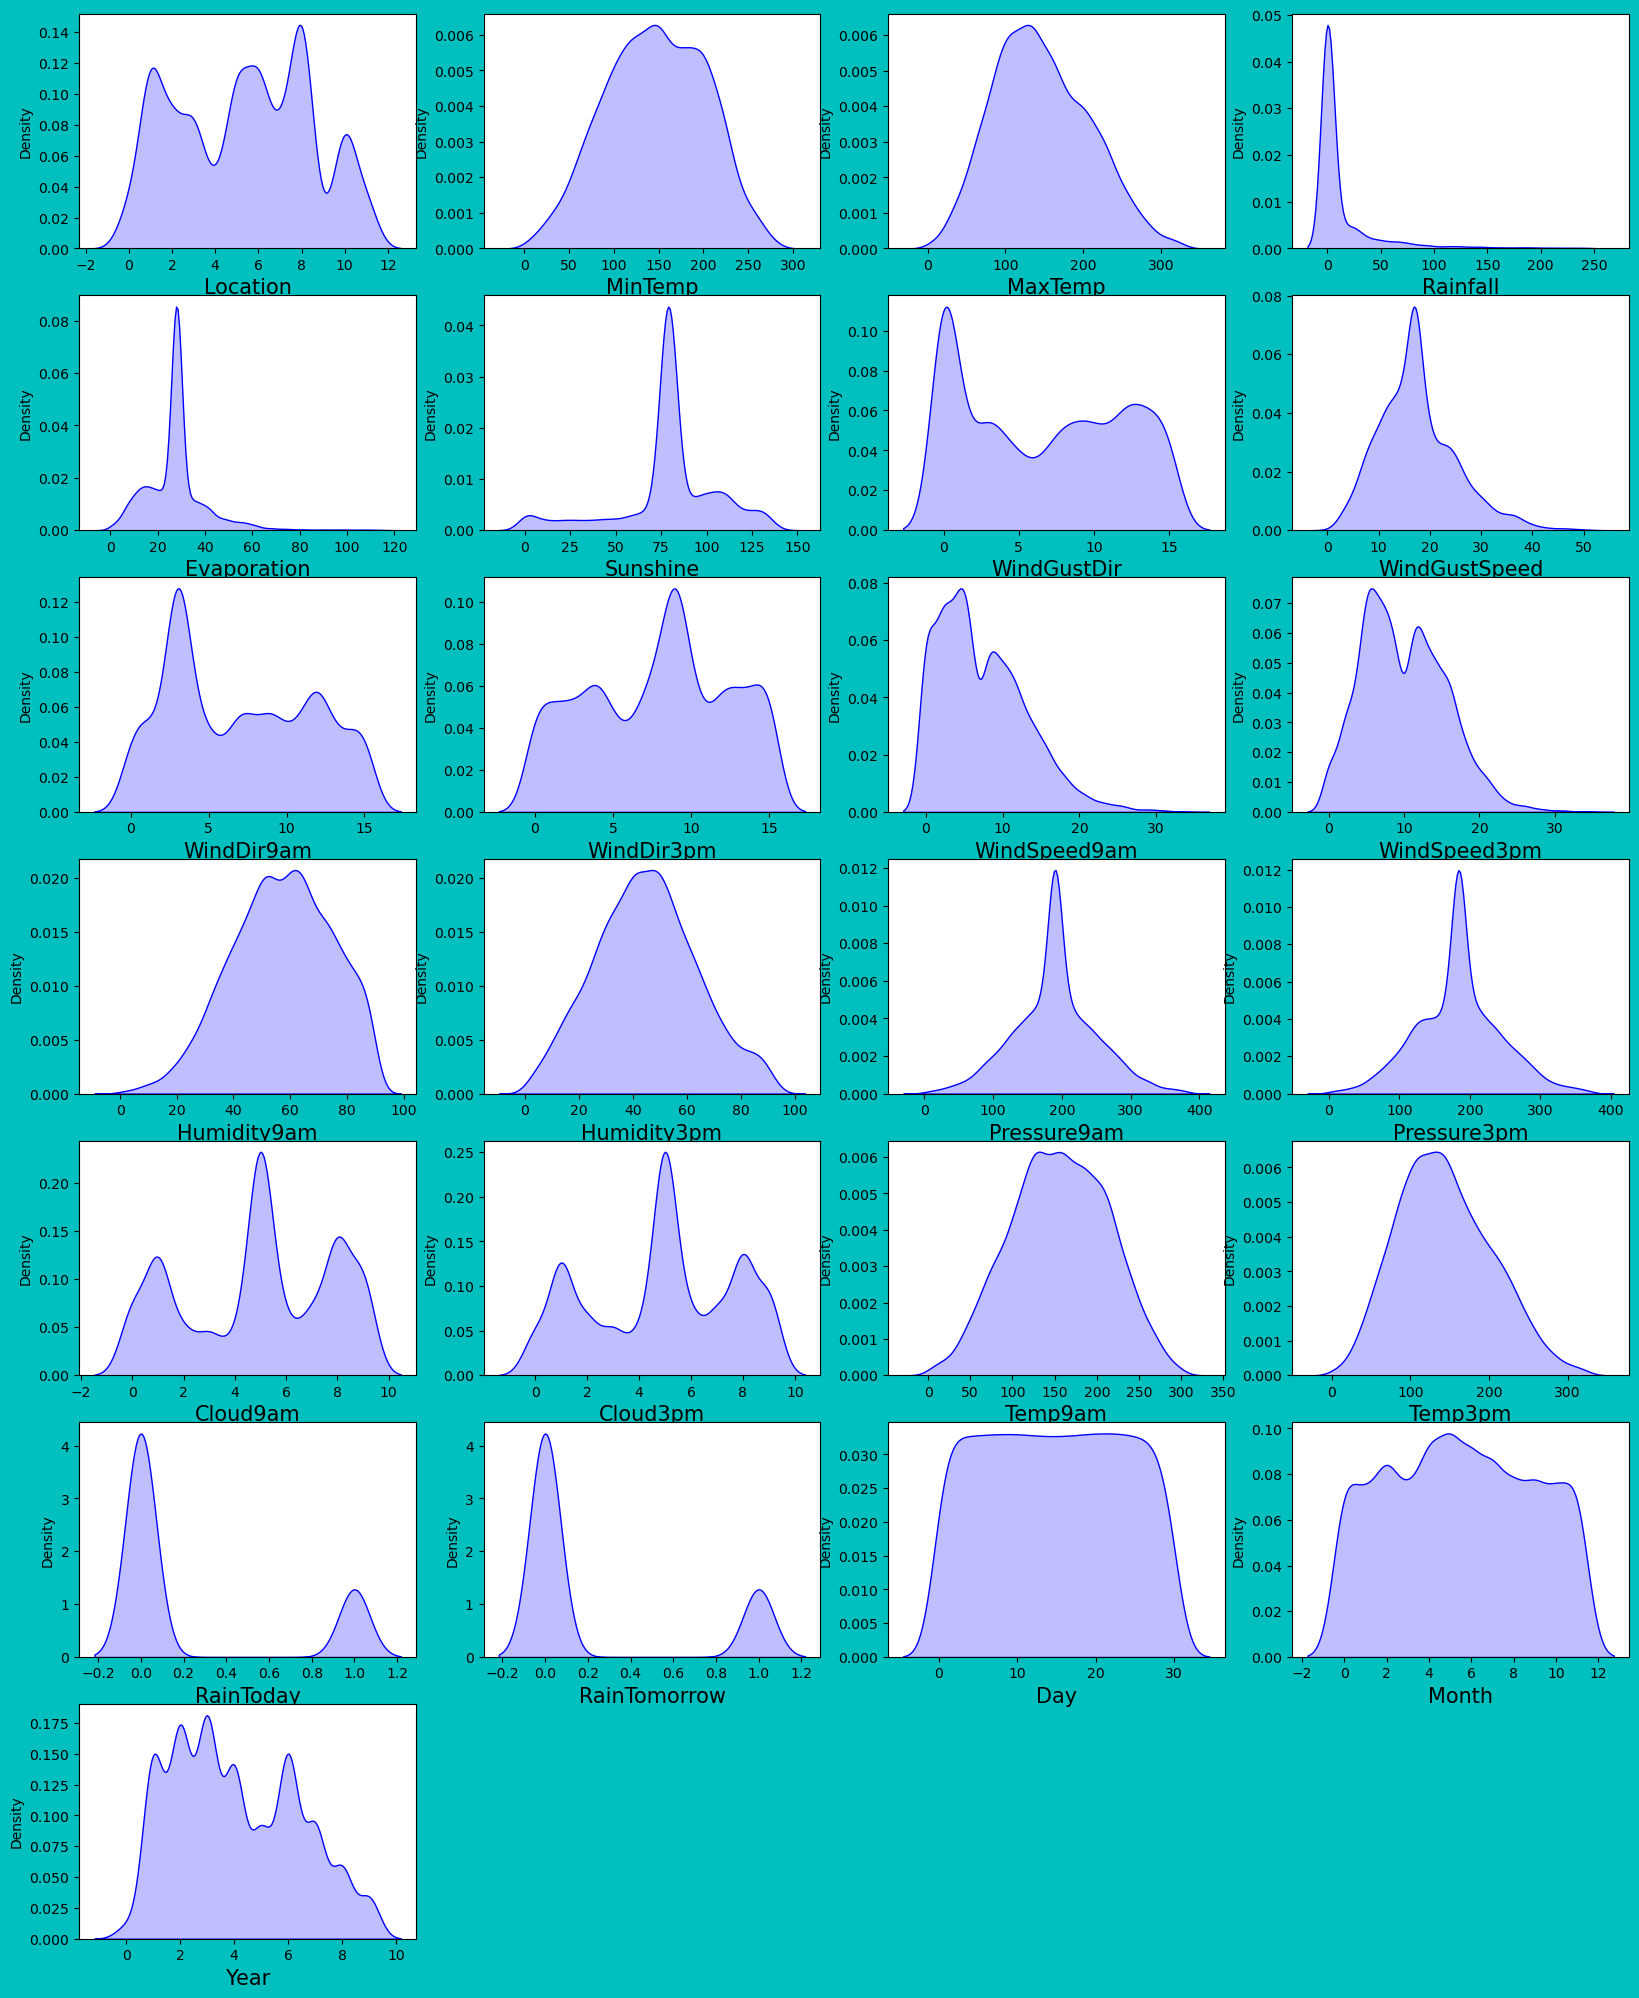

Location        -0.000009
MinTemp         -0.087073
MaxTemp          0.310241
Rainfall         3.514619
Evaporation      1.683232
Sunshine        -0.849825
WindGustDir      0.105287
WindGustSpeed    0.733229
WindDir9am       0.220355
WindDir3pm      -0.123726
WindSpeed9am     0.842449
WindSpeed3pm     0.461378
Humidity9am     -0.245186
Humidity3pm      0.145790
Pressure9am      0.055860
Pressure3pm      0.092744
Cloud9am        -0.239042
Cloud3pm        -0.196207
Temp9am         -0.057234
Temp3pm          0.329744
RainToday        1.266937
RainTomorrow     1.266937
Day              0.006240
Month            0.021988
Year             0.354481
dtype: float64


In [70]:
#checking for skewness
plt.figure(figsize=(20,25),facecolor='c')
pltnum=1
for col in df:
    if pltnum<=25:
        ax=plt.subplot(7,4,pltnum)
        sns.distplot(df[col],color='blue',hist=False,kde_kws={'shade':True})
        plt.xlabel(col,fontsize=15)
    pltnum+=1
plt.show()
print(df.skew())

Almost all columns are normally distributed except for 'Rainfall'. The skewness of 'Rainfall' can be neglected as it is the target feature

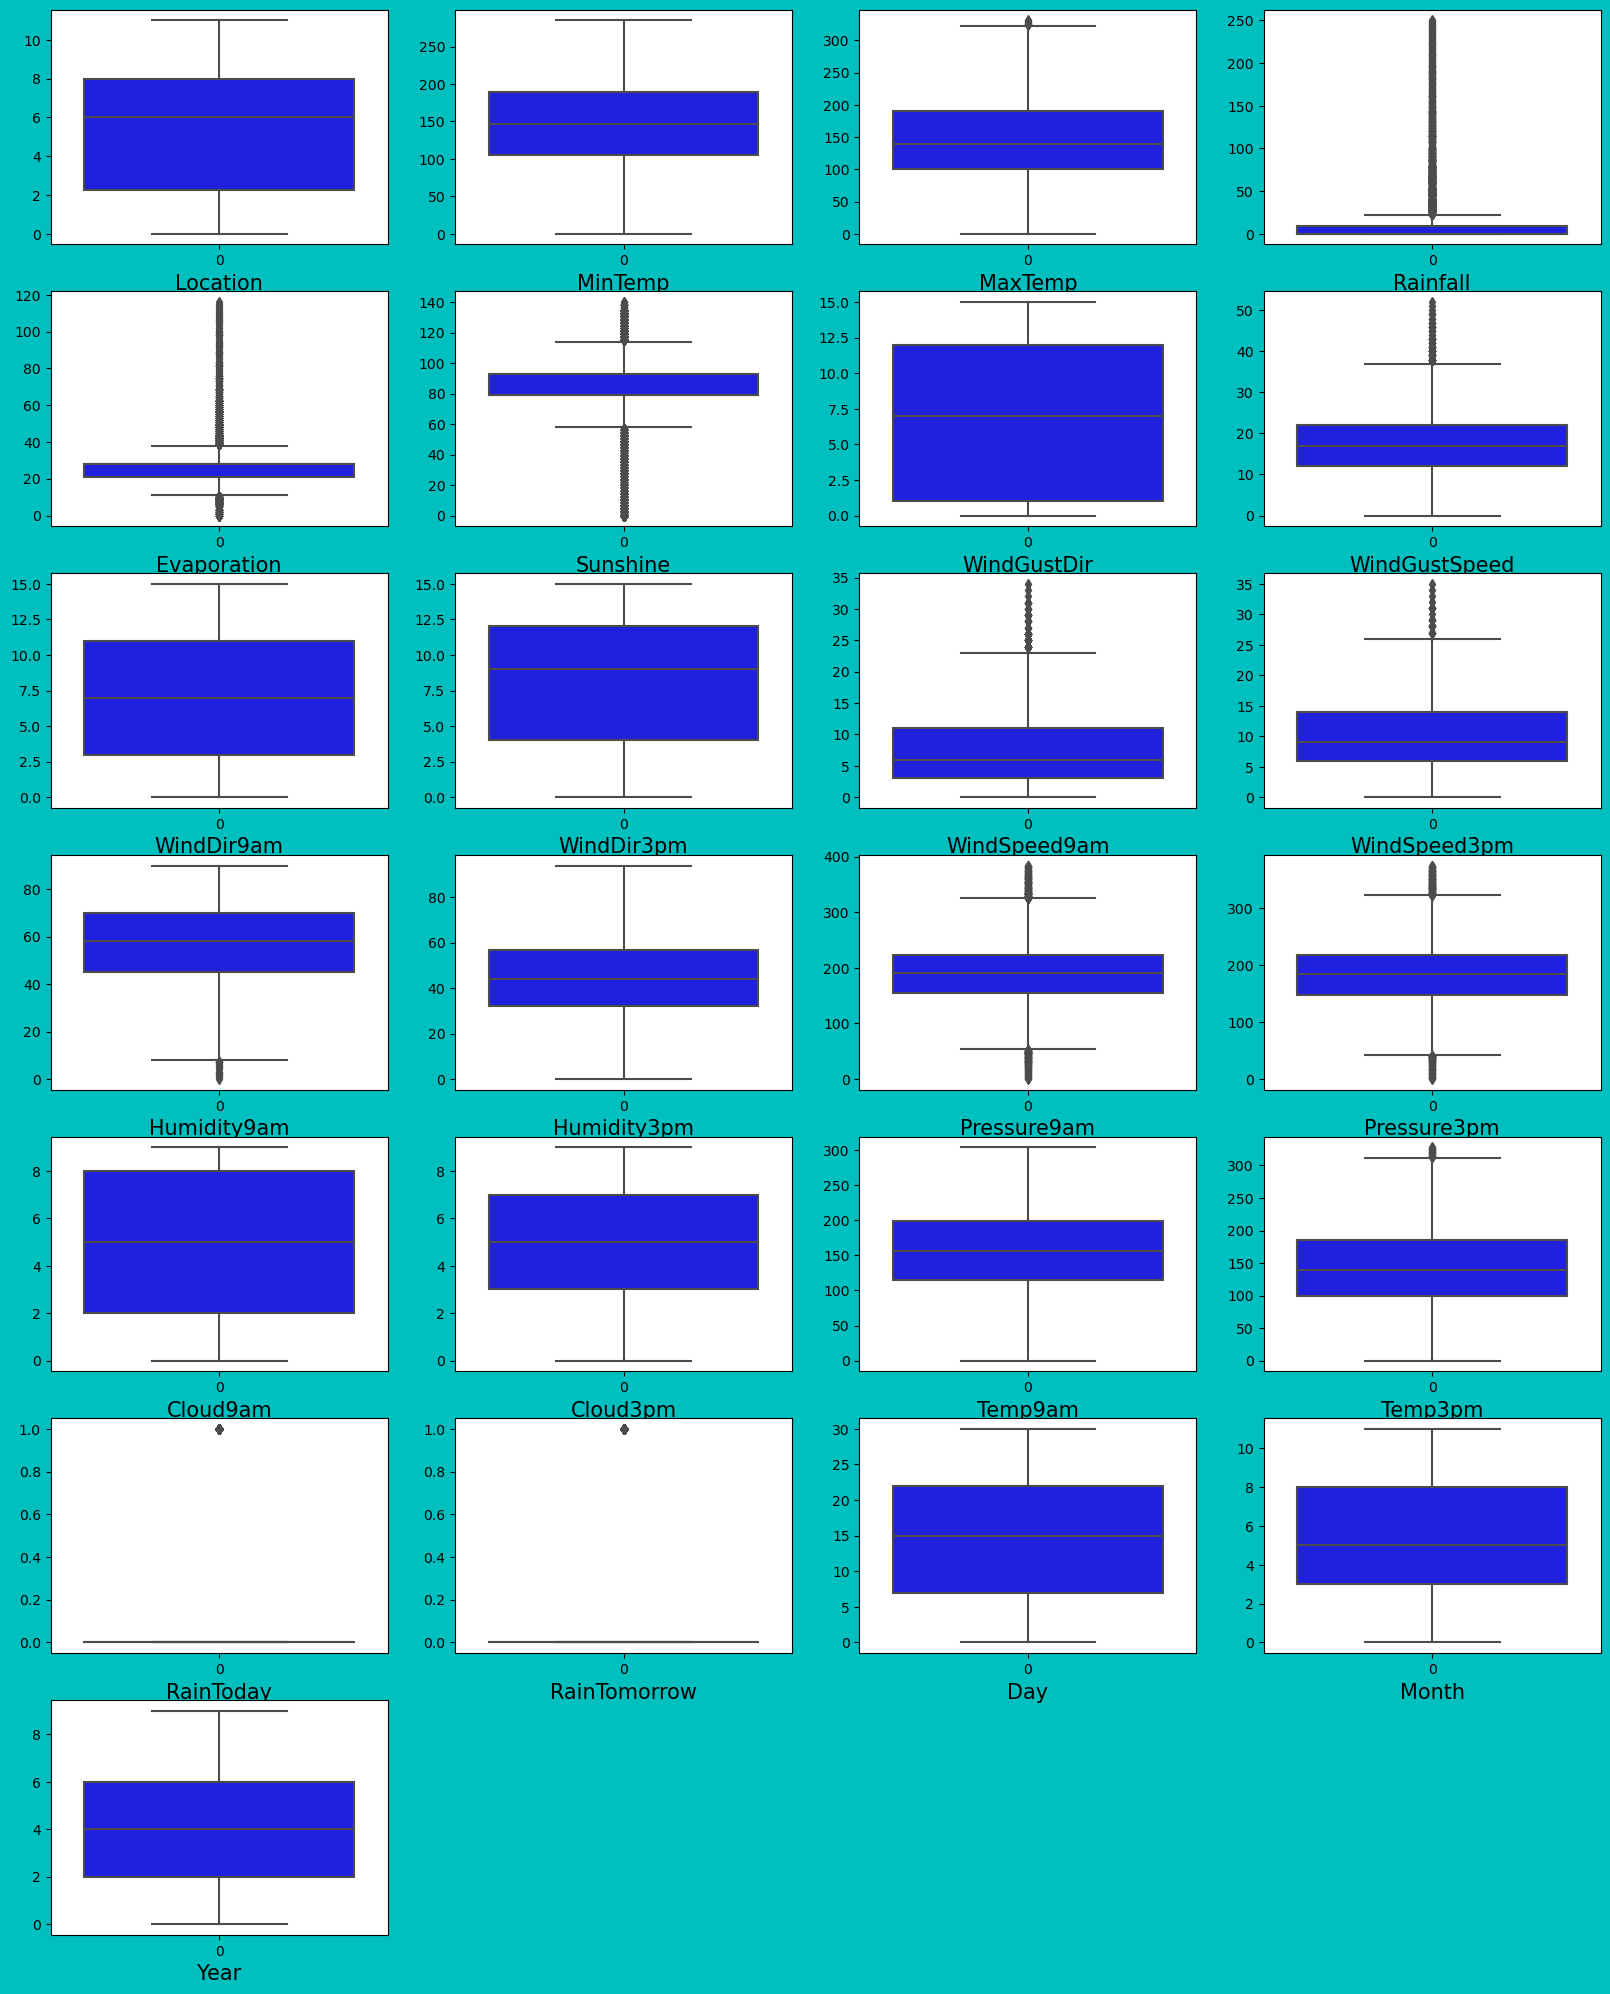

In [71]:
#checking for outliers
plt.figure(figsize=(20,25),facecolor='c')
pltnum=1
for col in df:
    if pltnum<=25:
        ax=plt.subplot(7,4,pltnum)
        sns.boxplot(df[col],color='blue')
        plt.xlabel(col,fontsize=15)
    pltnum+=1
plt.show()

There are the presence of outliers in the Dataset.

# Removal of outliers

In [25]:
from scipy.stats import zscore

In [26]:
z=np.abs(zscore(df))

In [27]:
thresholds=3
df1=df[(z<3).all(axis=1)]

In [28]:
df1.shape

(6314, 25)

In [29]:
#percentage of datalose
lose=(df.shape[0]-df1.shape[0])/df.shape[0]*100
print('Percentage of datalose is :',lose)

Percentage of datalose is : 6.625258799171843


# correlation

In [78]:
df1.corr()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
Location,1.000000,0.091880,0.070641,0.005603,0.128173,0.052570,-0.084887,0.270305,-0.099713,0.003547,...,-0.021908,-0.002846,-0.004917,0.098150,0.066011,-0.007709,0.000877,-0.003334,-0.068961,0.508287
MinTemp,0.091880,1.000000,0.734276,0.080376,0.363058,0.054109,-0.138100,0.240065,-0.019159,-0.140328,...,-0.446723,0.082693,0.032784,0.894092,0.703249,0.059941,0.085818,0.020911,-0.237388,0.034607
MaxTemp,0.070641,0.734276,1.000000,-0.176338,0.475917,0.357241,-0.195367,0.165992,-0.185742,-0.158497,...,-0.426186,-0.237003,-0.234200,0.866459,0.974819,-0.220656,-0.155615,0.021442,-0.176410,0.085725
Rainfall,0.005603,0.080376,-0.176338,1.000000,-0.152463,-0.214765,0.091059,0.099113,0.124138,0.083279,...,-0.042991,0.249705,0.206054,-0.062393,-0.185548,0.782614,0.297183,-0.004819,-0.001622,-0.003983
Evaporation,0.128173,0.363058,0.475917,-0.152463,1.000000,0.409995,-0.128419,0.198521,-0.133068,-0.015724,...,-0.305557,-0.122895,-0.162688,0.428232,0.464816,-0.185541,-0.110836,0.003028,-0.055916,0.117995
Sunshine,0.052570,0.054109,0.357241,-0.214765,0.409995,1.000000,-0.090757,0.032002,-0.071768,-0.053647,...,-0.081849,-0.536630,-0.554881,0.248450,0.374834,-0.232352,-0.328583,-0.001266,0.002695,0.051257
WindGustDir,-0.084887,-0.138100,-0.195367,0.091059,-0.128419,-0.090757,1.000000,0.017454,0.375901,0.455591,...,-0.014594,0.116880,0.072725,-0.152057,-0.206938,0.107965,0.032332,0.013680,0.028018,-0.184415
WindGustSpeed,0.270305,0.240065,0.165992,0.099113,0.198521,0.032002,0.017454,1.000000,-0.063606,0.094765,...,-0.332866,-0.002276,0.037101,0.219281,0.133465,0.074032,0.167434,-0.004631,0.049949,-0.020394
WindDir9am,-0.099713,-0.019159,-0.185742,0.124138,-0.133068,-0.071768,0.375901,-0.063606,1.000000,0.205758,...,0.056712,0.061377,0.048178,-0.060891,-0.194433,0.142939,0.028486,-0.008000,0.018272,-0.084525
WindDir3pm,0.003547,-0.140328,-0.158497,0.083279,-0.015724,-0.053647,0.455591,0.094765,0.205758,1.000000,...,-0.045786,0.070549,0.047770,-0.144801,-0.170081,0.093104,-0.001245,-0.000732,0.025037,0.004600


<Axes: >

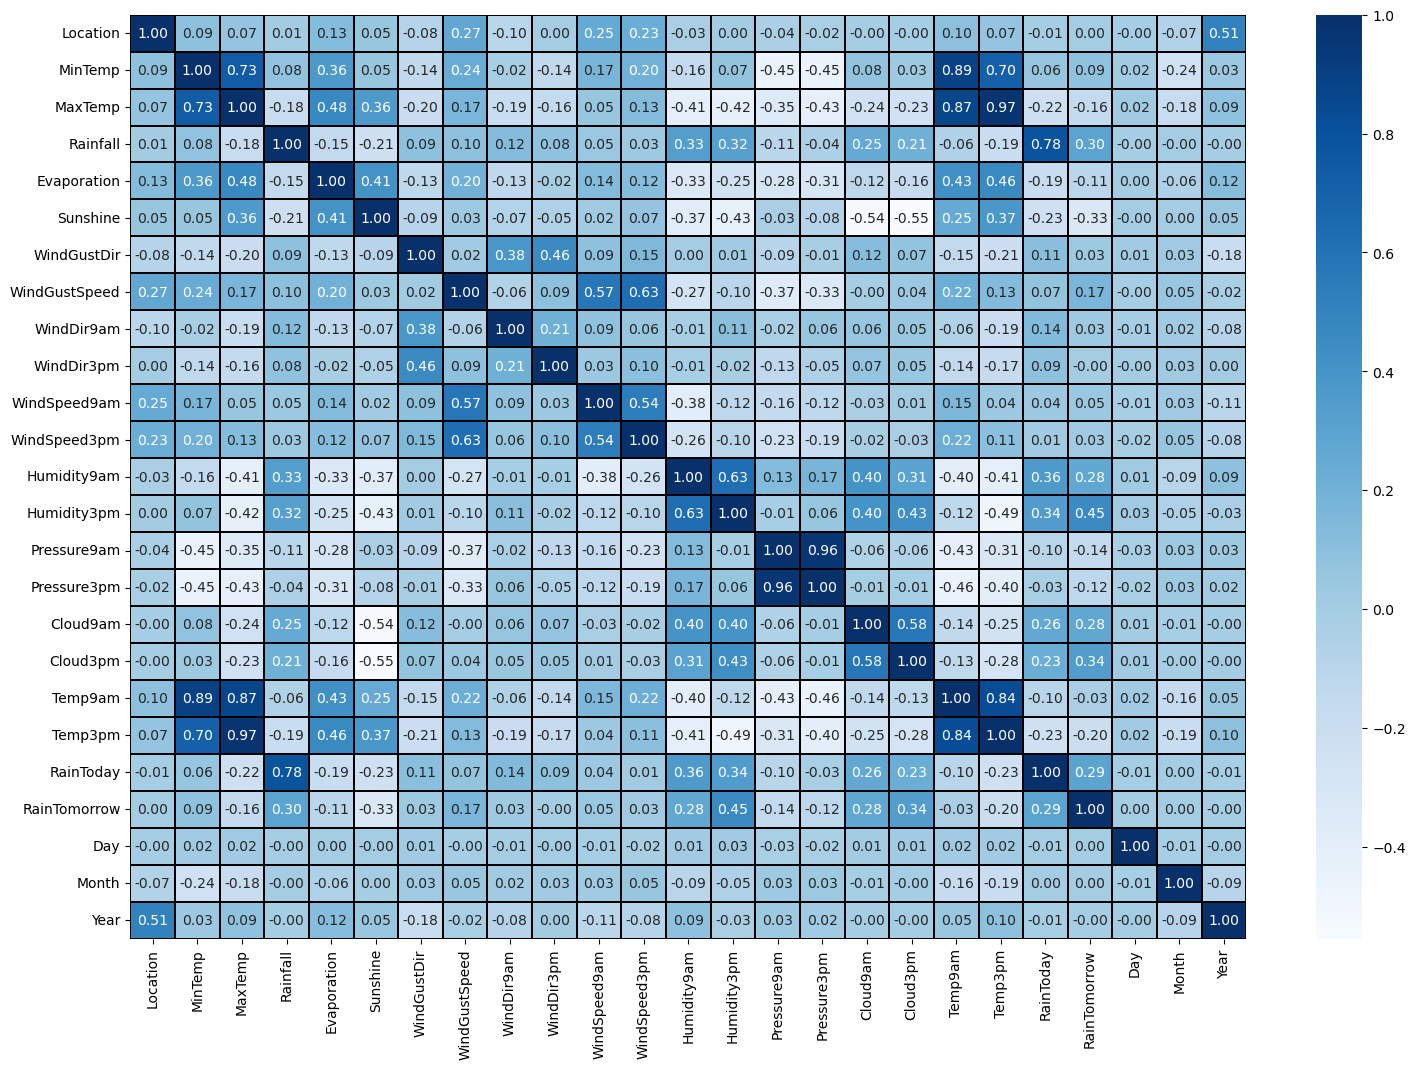

In [88]:
plt.figure(figsize=(18,12))
sns.heatmap(df1.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='.2f',cmap='Blues')

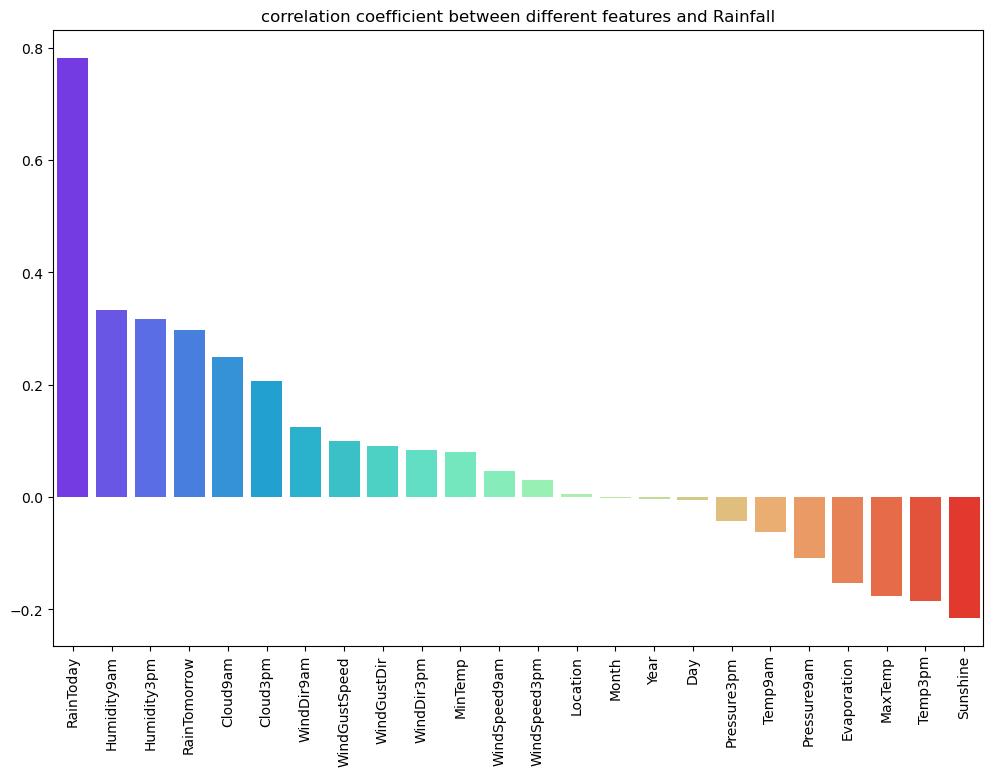

In [90]:
plt.figure(figsize=(12,8))
data=df1.corr()['Rainfall'].sort_values(ascending=False)
indices=data.index
labels=[]
corr=[]
for i in range(1,len(indices)):
    labels.append(indices[i])
    corr.append(data[i])
sns.barplot(x=labels,y=corr,palette='rainbow')
plt.xticks(rotation=90)
plt.title('correlation coefficient between different features and Rainfall')

plt.show()

Rainfall :-                                                                                                                     
*is positively correlated with Raintoday                                                                                        
*negatively correlated with sunsine.

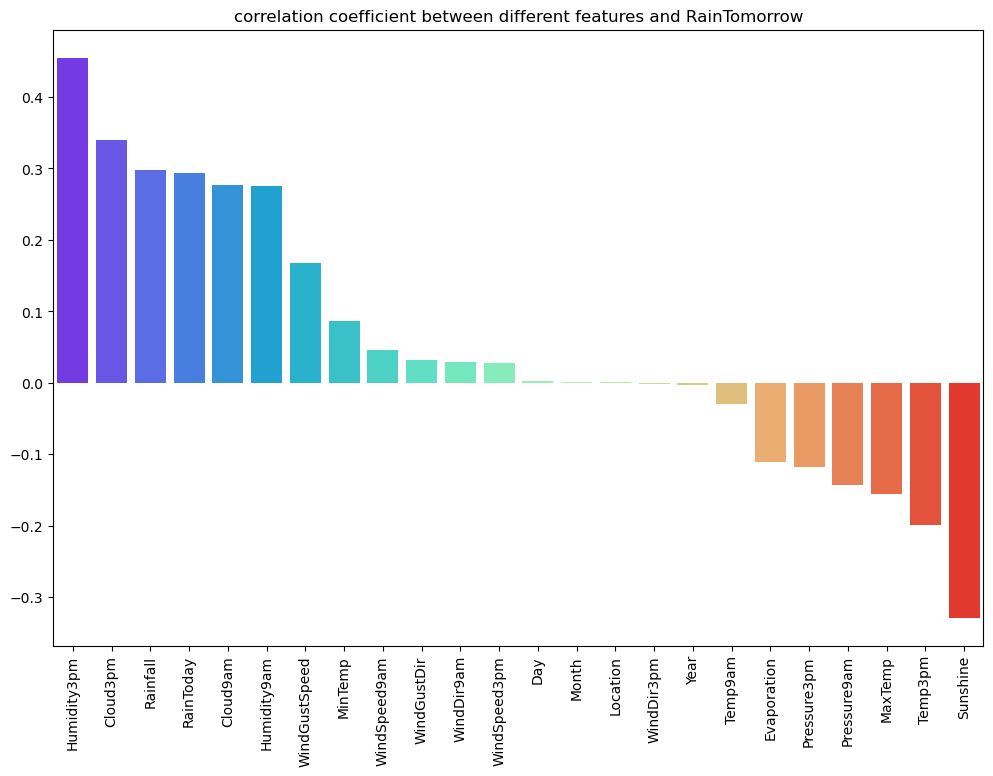

In [91]:
plt.figure(figsize=(12,8))
data=df1.corr()['RainTomorrow'].sort_values(ascending=False)
indices=data.index
labels=[]
corr=[]
for i in range(1,len(indices)):
    labels.append(indices[i])
    corr.append(data[i])
sns.barplot(x=labels,y=corr,palette='rainbow')
plt.xticks(rotation=90)
plt.title('correlation coefficient between different features and RainTomorrow')

plt.show()

'RainTomorrow':-
* positively correlated with Humidity 3pm,cloud3pm,rainfall.                                                                    
* negatively correlated with sunsine,temp3pm.

In [30]:
#spliting data
x=df1.drop(columns=['RainTomorrow'])
y=df1['RainTomorrow']


In [35]:
print(x.shape,y.shape)

(6314, 24) (6314,)


# scaling

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
st=StandardScaler()

In [35]:
x_scale=st.fit_transform(x)
x_new=pd.DataFrame(x_scale,columns=x.columns)

# Varience Inflation Factor
Varience_inflation_factor is used to check for multicollinearity

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
vif=pd.DataFrame()
vif['Features list']=x_new.columns
vif['vif value']=[variance_inflation_factor(x_new.values,i) for i in range(len(x_new.columns))]
vif

,Features list,vif value
0,Location,1.651041
1,MinTemp,9.229496
2,MaxTemp,26.295521
3,Rainfall,2.653210
4,Evaporation,1.623990
5,Sunshine,2.022226
6,WindGustDir,1.564235
7,WindGustSpeed,2.304013
8,WindDir9am,1.326368
9,WindDir3pm,1.416944


# PCA(Principle Component Analysis)

In [41]:
from sklearn.decomposition import PCA

In [42]:
pca=PCA()

In [46]:
x=pca.fit_transform(x_new)

In [47]:
x=pd.DataFrame(x,columns=x_new.columns)

In [48]:
vif=pd.DataFrame()
vif['Features list']=x.columns
vif['vif value']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,Features list,vif value
0,Location,1.0
1,MinTemp,1.0
2,MaxTemp,1.0
3,Rainfall,1.0
4,Evaporation,1.0
5,Sunshine,1.0
6,WindGustDir,1.0
7,WindGustSpeed,1.0
8,WindDir9am,1.0
9,WindDir3pm,1.0


we can see multicollinearity is reduced.

# Model Building

# a) Prediction model for 'Rain Tomorrow'

In [50]:
#importing libraries
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=40)

In [52]:
model=[LogisticRegression(),SVC(),KNeighborsClassifier(),GradientBoostingClassifier(),RandomForestClassifier(),AdaBoostClassifier(),ExtraTreesClassifier(),GaussianNB(),DecisionTreeClassifier()]

# Finding Best Random state

In [53]:
maxAccu=0
maxRS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        
print('Maximum Accuracy Score Is :',maxAccu,'On RandomState :',maxRS)

Maximum Accuracy Score Is : 0.8701504354711006 On RandomState : 85


In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=85)

In [55]:
print(x_train.shape,y_train.shape)

(5051, 24) (5051,)


In [56]:
print(x_test.shape,y_test.shape)

(1263, 24) (1263,)


# Evaluation metrics of different models

In [57]:
for m in model:
    m.fit(x_train,y_train)
    y_pred=m.predict(x_test)
    print('Evaluation Metics of ',m,':')
    print('\n')
    print('Accuracy Score :\n',accuracy_score(y_test,y_pred))
    print('\n')
    print('Confusion Matrix :\n',confusion_matrix(y_test,y_pred))
    print('\n')
    print('Classification Report :\n',classification_report(y_test,y_pred))
    print('_'*100)

Evaluation Metics of  LogisticRegression() :


Accuracy Score :
 0.8701504354711006


Confusion Matrix :
 [[962  44]
 [120 137]]


Classification Report :
               precision    recall  f1-score   support

           0       0.89      0.96      0.92      1006
           1       0.76      0.53      0.63       257

    accuracy                           0.87      1263
   macro avg       0.82      0.74      0.77      1263
weighted avg       0.86      0.87      0.86      1263

____________________________________________________________________________________________________
Evaluation Metics of  SVC() :


Accuracy Score :
 0.8709422011084719


Confusion Matrix :
 [[978  28]
 [135 122]]


Classification Report :
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1006
           1       0.81      0.47      0.60       257

    accuracy                           0.87      1263
   macro avg       0.85      0.72      0.76      1263
wei

Here LogisticRegression model is working good with accuracy score 0.87015

# Cross Validation Score

In [99]:
lg=LogisticRegression()
score=cross_val_score(lg,x,y,cv=5)
print('\n')
print('Cross Validation Score of ',lg,':\n')
print('Score :',score)
print('Mean Score :',score.mean())
print('Standard Deviation :',score.std())




Cross Validation Score of  LogisticRegression() :

Score : [0.86460808 0.79651623 0.77434679 0.83689628 0.85023772]
Mean Score : 0.8245210194327646
Standard Deviation : 0.03383249578356156


# Hyper Parameter Tuning

In [100]:
param = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'max_iter': [100, 200, 300],
    'class_weight': [None, 'balanced']
}

In [101]:
grid=GridSearchCV(estimator=LogisticRegression(),param_grid=param,cv=5)
grid.fit(x,y)
print(grid)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs', 'saga']})


In [102]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 0.01, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.828954907002044


In [58]:
final_model=LogisticRegression(C=0.01, class_weight= None, max_iter=100, penalty='l2' , solver='lbfgs')
final_model.fit(x_train,y_train)
y_pred=final_model.predict(x_test)
print('Accuracy Score :\n',accuracy_score(y_test,y_pred))
print('\n')
print('Confusion Matrix :\n',confusion_matrix(y_test,y_pred))
print('\n')
print('Classification Report :\n',classification_report(y_test,y_pred))


Accuracy Score :
 0.8653998416468726


Confusion Matrix :
 [[970  36]
 [134 123]]


Classification Report :
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1006
           1       0.77      0.48      0.59       257

    accuracy                           0.87      1263
   macro avg       0.83      0.72      0.76      1263
weighted avg       0.86      0.87      0.85      1263



Text(0.5, 1.0, 'Confusion Matrix Heatmap')

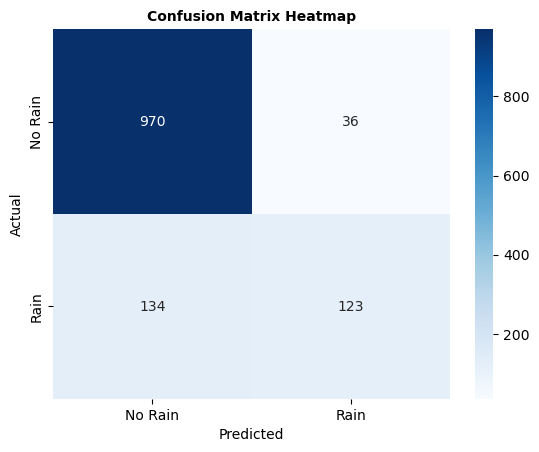

In [59]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues',fmt='d',xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap',fontweight='bold',fontsize=10)

# Auc-Roc Curve

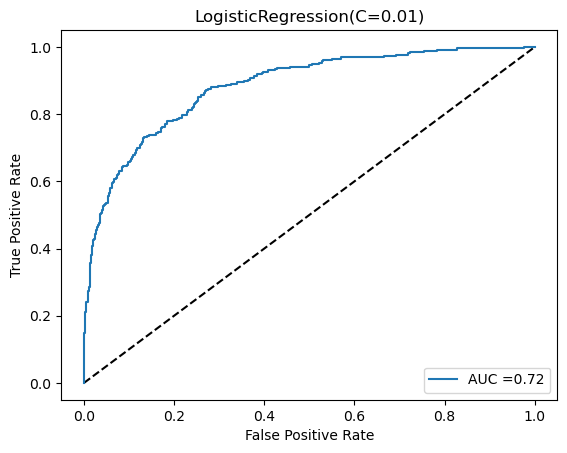

In [60]:
final_model.fit(x_train,y_train)
y_pred_prob=final_model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
auc_score=roc_auc_score(y_test,final_model.predict(x_test))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='AUC ='+str(round(auc_score,2)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title(final_model)
plt.show()

# Saving the model

In [61]:
import joblib

In [62]:
joblib.dump(final_model,'Rainfall Weather Forecasting_Rain Tomorrow.obj')

['Rainfall Weather Forecasting_Rain Tomorrow.obj']

# Final Prediction

In [63]:
predictions=final_model.predict(x_test)
actual=np.array(y_test)
df_pred=pd.DataFrame()
df_pred['Prediction RainTomorrow']=predictions
df_pred['Actual RainTomorrow']=actual
df_pred

,Prediction RainTomorrow,Actual RainTomorrow
0,0,0
1,0,0
2,1,1
3,1,1
4,0,0
...,...,...
1258,0,0
1259,0,0
1260,1,0
1261,0,0


In [64]:
df_pred['Prediction RainTomorrow'] = df_pred['Prediction RainTomorrow'].replace({0: 'No', 1: 'Yes'})
df_pred['Actual RainTomorrow'] = df_pred['Actual RainTomorrow'].replace({0: 'No', 1: 'Yes'})
df_pred

,Prediction RainTomorrow,Actual RainTomorrow
0,No,No
1,No,No
2,Yes,Yes
3,Yes,Yes
4,No,No
...,...,...
1258,No,No
1259,No,No
1260,Yes,No
1261,No,No


# b) Predicting model for 'Rainfall'

In [31]:
X=df1.drop(columns=['Rainfall'])
Y=df1['Rainfall']

In [32]:
print(X.shape,Y.shape)

(6314, 24) (6314,)


# Scaling

In [36]:
X_scale=st.fit_transform(X)
X_new=pd.DataFrame(X_scale,columns=X.columns)

# Varience Inflation Factor

In [38]:
VIF=pd.DataFrame()
VIF['Features list']=X_new.columns
VIF['vif value']=[variance_inflation_factor(X_new.values,i) for i in range(len(X_new.columns))]
VIF

,Features list,vif value
0,Location,1.658069
1,MinTemp,9.238173
2,MaxTemp,26.312285
3,Evaporation,1.623668
4,Sunshine,2.045768
5,WindGustDir,1.567363
6,WindGustSpeed,2.380034
7,WindDir9am,1.326045
8,WindDir3pm,1.418672
9,WindSpeed9am,2.065033


we will drop the column 'Temp9am'

In [40]:
X_new=X_new.drop(columns=['Temp9am'])

# PCA(Principle Component Analysis)

In [43]:
X=pca.fit_transform(X_new)
X=pd.DataFrame(X,columns=X_new.columns)

In [44]:
VIF=pd.DataFrame()
VIF['Features list']=X.columns
VIF['vif value']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
VIF

,Features list,vif value
0,Location,1.0
1,MinTemp,1.0
2,MaxTemp,1.0
3,Evaporation,1.0
4,Sunshine,1.0
5,WindGustDir,1.0
6,WindGustSpeed,1.0
7,WindDir9am,1.0
8,WindDir3pm,1.0
9,WindSpeed9am,1.0


In [81]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection  import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_score


In [46]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.20,random_state=45)

In [47]:
model=[LinearRegression(),Lasso(),Ridge(),SVR(),RandomForestRegressor(),GradientBoostingRegressor(),AdaBoostRegressor(),ExtraTreesRegressor(),DecisionTreeRegressor(),KNeighborsRegressor()]

# Finding Random State

In [48]:
maxScore = 0
maxRs = 0

for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = .02, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    lr.score(x_train,y_train)
    pred = lr.predict(x_test)
    score = r2_score(y_test,pred)
    if score>maxScore:
        maxScore = score
        maxRs=i
print("Best Accuracy is:", maxScore, "on Random State:", maxRs)  

Best Accuracy is: 0.7556626697357461 on Random State: 126


In [49]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.02,random_state=126)

In [50]:
print(x_train.shape,y_train.shape)

(6187, 23) (6187,)


In [51]:
print(x_test.shape,y_test.shape)

(127, 23) (127,)


# Evaluation Matrics for different models

In [52]:
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('Evaluation metrics of',m,':')
    print(f" R2 score is: {r2_score(y_test,pred)*100}")
    print ('\n','mean_absolute_error:','\n',mean_absolute_error(y_test,pred))
    print ('\n','mean_squared_error:','\n',mean_squared_error(y_test,pred))
    print('_'*100)

Evaluation metrics of LinearRegression() :
 R2 score is: 75.56626697357461

 mean_absolute_error: 
 5.37616736395733

 mean_squared_error: 
 97.72099507650918
____________________________________________________________________________________________________
Evaluation metrics of Lasso() :
 R2 score is: 70.26182446999046

 mean_absolute_error: 
 6.592686008026909

 mean_squared_error: 
 118.93573943079046
____________________________________________________________________________________________________
Evaluation metrics of Ridge() :
 R2 score is: 75.56382683499339

 mean_absolute_error: 
 5.375759968997025

 mean_squared_error: 
 97.73075423897625
____________________________________________________________________________________________________
Evaluation metrics of SVR() :
 R2 score is: 57.17437940248213

 mean_absolute_error: 
 5.642189712850051

 mean_squared_error: 
 171.27805460722706
___________________________________________________________________________________________

Here  LinearRegression is working good with r2 score 75.56

# Cross Validation Score

In [88]:
lr= LinearRegression()
score=cross_val_score(lr,X,Y,cv=5)

print('Cross Validation Score',lr, ':')
print('\n')
print("Score :" ,score)
print("Mean Score :",score.mean())
print("Standard deviation :",score.std())


Cross Validation Score LinearRegression() :


Score : [0.61452894 0.62478826 0.58960703 0.58281468 0.67411558]
Mean Score : 0.6171708969392051
Standard deviation : 0.03239696787462381


# Hyper Parameter Tuning

In [92]:
param={ 'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [None, -1, 1, 2]}

In [93]:
grid=GridSearchCV(estimator=LinearRegression(),param_grid=param,cv=5)
grid.fit(X,Y)
print(grid)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [None, -1, 1, 2]})


In [94]:
print(grid.best_score_)
print(grid.best_params_)

0.6171708969392051
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None}


In [95]:
Final_model=LinearRegression(copy_X=True,fit_intercept=True,n_jobs=None)

In [96]:
Final_model.fit(x_train, y_train)
pred_test = Final_model.predict(x_test)

print('R2 Score',r2_score(y_test,pred_test))
print('Mean Squared Error',mean_squared_error(y_test,pred_test))
print('Mean Absolute Error',mean_absolute_error(y_test,pred_test))

R2 Score 0.7556626697357461
Mean Squared Error 97.72099507650918
Mean Absolute Error 5.37616736395733


# Saving The File

In [97]:
import joblib
joblib.dump(Final_model,'Rainfall Weather Forecasting-RainFall.obj')

['Rainfall Weather Forecasting-RainFall.obj']

# Final Prediction

In [98]:
predictions=Final_model.predict(x_test)
actual=np.array(y_test)
dfpred=pd.DataFrame()
dfpred['Predicted RainFall']=predictions
dfpred['Actual RainFall']=actual
dfpred

,Predicted RainFall,Actual RainFall
0,1.192965,0
1,2.167721,0
2,-0.304961,0
3,4.257287,0
4,5.797554,0
...,...,...
122,0.938138,22
123,0.766236,0
124,5.599153,0
125,-1.026660,0


# ________________  Thank You  ____________________